In [125]:
## import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\kater\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

In [49]:
warnings.filterwarnings('ignore')

In [50]:
## Getting train data

fraud = pd.read_csv('online_fraud.csv')

In [51]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [52]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [53]:
## Data Cleaning
fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [54]:
## To identify rows in the DataFrame where at least one value is missing (NaN/null) across any column
fraud[fraud.isnull().any(axis = 1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [55]:
## How many types of diffenent valies in each column
unique_values = fraud.nunique()
print(unique_values)

step                  7
type                  5
amount             9954
nameOrig          10000
oldbalanceOrg      7236
newbalanceOrig     5869
nameDest           6397
oldbalanceDest     4118
newbalanceDest     1473
isFraud               2
isFlaggedFraud        1
dtype: int64


In [56]:
## Checking for the actual values in the columns
unique_values = fraud.apply(lambda x: x.unique())
print(unique_values)

step                                          [1, 2, 3, 4, 5, 6, 7]
type                  [PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN]
amount            [9839.64, 1864.28, 181.0, 11668.14, 7817.71, 7...
nameOrig          [C1231006815, C1666544295, C1305486145, C84008...
oldbalanceOrg     [170136.0, 21249.0, 181.0, 41554.0, 53860.0, 1...
newbalanceOrig    [160296.36, 19384.72, 0.0, 29885.86, 46042.29,...
nameDest          [M1979787155, M2044282225, C553264065, C389970...
oldbalanceDest    [0.0, 21182.0, 41898.0, 10845.0, 5083.0, 22425...
newbalanceDest    [0.0, 40348.79, 157982.12, 51513.44, 16896.7, ...
isFraud                                                      [0, 1]
isFlaggedFraud                                                  [0]
dtype: object


In [57]:
## Column names
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [58]:
# Statistical description and understanding of dispersion of data
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
step,10000.0,4.178900e+00,2.479821e+00,1.00,1.0000,5.000,7.0000,7.0
amount,10000.0,1.035467e+05,2.663072e+05,2.39,4397.5300,12858.740,114382.4800,10000000.0
oldbalanceOrg,10000.0,8.939485e+05,2.135757e+06,0.00,127.6875,21375.555,178271.9200,12900000.0
newbalanceOrig,10000.0,9.152898e+05,2.181506e+06,0.00,0.0000,10349.940,176093.4400,13000000.0
oldbalanceDest,10000.0,9.342614e+05,2.676323e+06,0.00,0.0000,0.000,283106.6825,19500000.0
newbalanceDest,10000.0,1.096881e+06,3.015833e+06,0.00,0.0000,0.000,252055.2400,19200000.0
isFraud,10000.0,6.800000e-03,8.218537e-02,0.00,0.0000,0.000,0.0000,1.0
isFlaggedFraud,10000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.0000,0.0


In [59]:
#step: represents a unit of time where 1 step equals 1 hour
#type: type of online transaction
#amount: the amount of the transaction
#nameOrig: customer starting the transaction
#oldbalanceOrg: balance before the transaction
#newbalanceOrig: balance after the transaction
#nameDest: recipient of the transaction
#oldbalanceDest: initial balance of recipient before the transaction
#newbalanceDest: the new balance of recipient after the transaction
#isFraud: fraud transaction

In [60]:
# Exploring transaction type
print(fraud.type.value_counts())

type
PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: count, dtype: int64


In [61]:
## Pie chart to show percentage of each type of transaction
type = fraud['type'].value_counts()
transactions = type.index
quantity = type.values


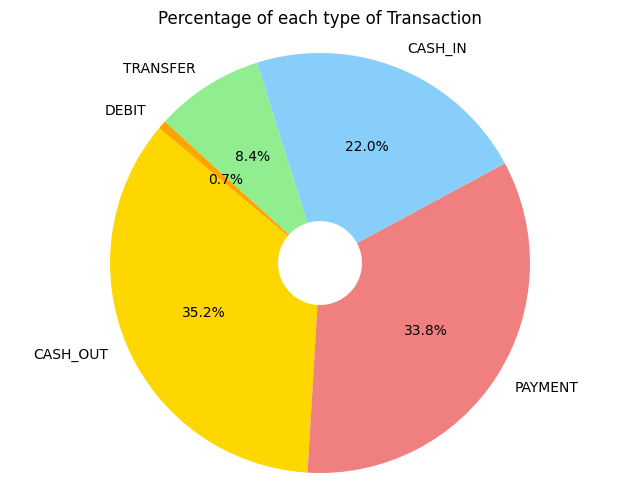

In [62]:


# Sample data
type = {'CASH_OUT': 2237500, 'PAYMENT': 2151495, 'CASH_IN': 1399284, 'TRANSFER': 532909, 'DEBIT': 41432}
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Create a pie chart with different colors and a hole (donut chart)
plt.figure(figsize=(8, 6))
plt.pie(type.values(), labels=type.keys(), autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.8))
plt.title('Percentage of each type of Transaction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [63]:

# Calculate the total value for each transaction type
total_value_by_type = fraud.groupby('type')['amount'].sum()

# Display the result
print(total_value_by_type)

type
CASH_IN     3.275129e+08
CASH_OUT    2.292032e+08
DEBIT       1.230348e+06
PAYMENT     4.312667e+07
TRANSFER    4.343938e+08
Name: amount, dtype: float64


In [64]:
# Converting to readable amounts
fraud_amounts = {
    'CASH_IN': 2.363674e+11,
    'CASH_OUT': 3.944130e+11,
    'DEBIT': 2.271992e+08,
    'PAYMENT': 2.809337e+10,
    'TRANSFER': 4.852920e+11
}

# Function to convert scientific notation to readable amount in billions
def scientific_to_readable(amount):
    billions = amount / 1e9
    return "{:,.2f}B".format(billions)

# Convert the amounts to readable format
readable_amounts = {transaction_type: scientific_to_readable(amount) for transaction_type, amount in fraud_amounts.items()}

# Print the readable amounts
for transaction_type, readable_amount in readable_amounts.items():
    print(f"{transaction_type}: {readable_amount}")


CASH_IN: 236.37B
CASH_OUT: 394.41B
DEBIT: 0.23B
PAYMENT: 28.09B
TRANSFER: 485.29B


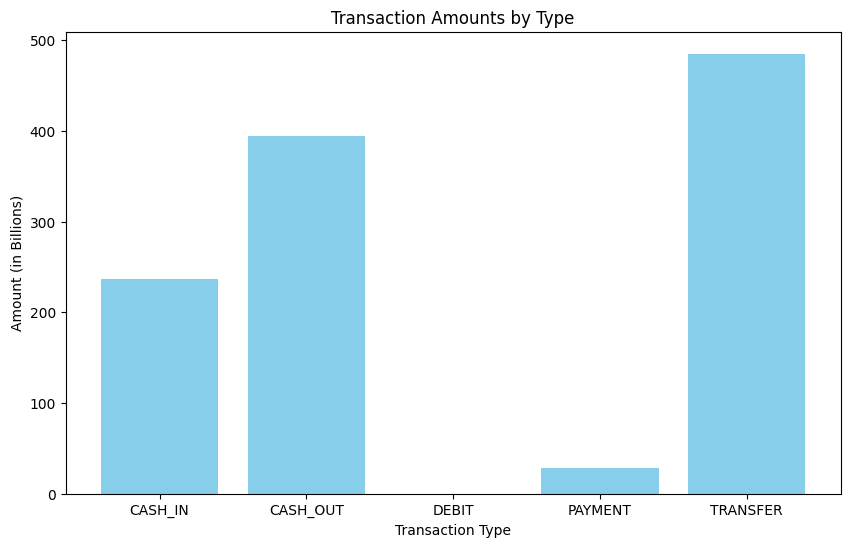

In [65]:

import matplotlib.pyplot as plt
# Provided data in readable amounts in billions
transaction_types = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
amounts_in_billions = [236.37, 394.41, 0.23, 28.09, 485.29]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(transaction_types, amounts_in_billions, color='skyblue')

# Adding title and labels
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (in Billions)')

# Display the bar chart
plt.show()


SUBSET_FRAUD OF 10000

In [66]:
import pandas as pd

# Create a subset with randomly chosen 10,000 rows
subset_fraud = fraud.sample(n=10000, random_state=42)  # Use a random_state for reproducibility
# Now 'subset' contains the randomly chosen 10,000 rows from your large dataset

In [67]:
subset_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 6252 to 7270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 937.5+ KB


In [68]:
## How many types of diffenent valies in each column
unique_values = subset_fraud.nunique()
print(unique_values)

step                  7
type                  5
amount             9954
nameOrig          10000
oldbalanceOrg      7236
newbalanceOrig     5869
nameDest           6397
oldbalanceDest     4118
newbalanceDest     1473
isFraud               2
isFlaggedFraud        1
dtype: int64


In [69]:
## Checking for the actual values in the columns
unique_values = subset_fraud.apply(lambda x: x.unique())
print(unique_values)

step                                          [6, 4, 1, 5, 2, 7, 3]
type                  [PAYMENT, TRANSFER, CASH_IN, CASH_OUT, DEBIT]
amount            [2002.96, 522854.73, 66413.56, 116878.6, 48952...
nameOrig          [C1612554042, C539322891, C1541075662, C150866...
oldbalanceOrg     [186648.78, 0.0, 7197141.06, 10700000.0, 24425...
newbalanceOrig    [184645.82, 0.0, 7263554.62, 11200000.0, 24812...
nameDest          [M1546272524, C1916720513, C1590550415, C17821...
oldbalanceDest    [0.0, 6255171.04, 19300000.0, 1356589.82, 7760...
newbalanceDest    [0.0, 6778025.76, 19200000.0, 906564.46, 67360...
isFraud                                                      [0, 1]
isFlaggedFraud                                                  [0]
dtype: object


In [70]:
# Statistical description and understanding of dispersion of data
subset_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
step,10000.0,4.178900e+00,2.479821e+00,1.00,1.0000,5.000,7.0000,7.0
amount,10000.0,1.035467e+05,2.663072e+05,2.39,4397.5300,12858.740,114382.4800,10000000.0
oldbalanceOrg,10000.0,8.939485e+05,2.135757e+06,0.00,127.6875,21375.555,178271.9200,12900000.0
newbalanceOrig,10000.0,9.152898e+05,2.181506e+06,0.00,0.0000,10349.940,176093.4400,13000000.0
oldbalanceDest,10000.0,9.342614e+05,2.676323e+06,0.00,0.0000,0.000,283106.6825,19500000.0
newbalanceDest,10000.0,1.096881e+06,3.015833e+06,0.00,0.0000,0.000,252055.2400,19200000.0
isFraud,10000.0,6.800000e-03,8.218537e-02,0.00,0.0000,0.000,0.0000,1.0
isFlaggedFraud,10000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.0000,0.0


In [71]:
## Data Cleaning
subset_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [72]:

# Exploring transaction type
print(subset_fraud.type.value_counts())

type
PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: count, dtype: int64


In [73]:
subset_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6252,6,PAYMENT,2002.96,C1612554042,186648.78,184645.82,M1546272524,0.00,0.00,0,0
4684,4,TRANSFER,522854.73,C539322891,0.00,0.00,C1916720513,6255171.04,6778025.76,0,0
1731,1,CASH_IN,66413.56,C1541075662,7197141.06,7263554.62,C1590550415,19300000.00,19200000.00,0,0
4742,4,CASH_OUT,116878.60,C1508667424,0.00,0.00,C1782113663,1356589.82,906564.46,0,0
4521,4,CASH_IN,489529.12,C656844049,10700000.00,11200000.00,C248609774,7760414.85,6736054.44,0,0


In [74]:
## Pie chart to show percentage of each type of transaction
type1 = subset_fraud['type'].value_counts()
transactions1 = type1.index
quantity = type1.values


In [75]:
type1

type
PAYMENT     5465
CASH_IN     1949
CASH_OUT    1321
TRANSFER     921
DEBIT        344
Name: count, dtype: int64

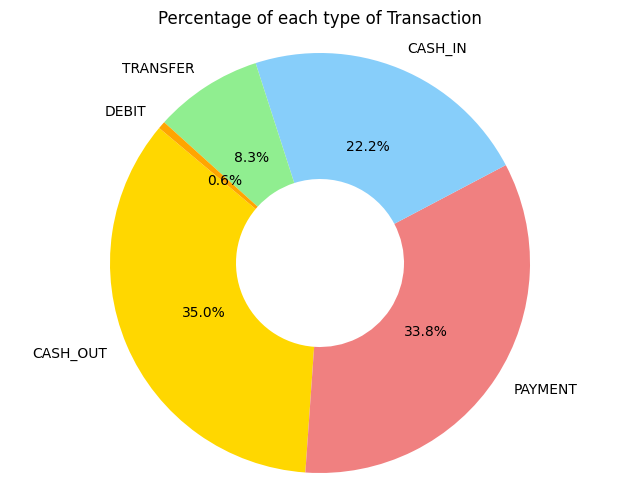

In [76]:
# Sample data
type1 = {'CASH_OUT': 3500, 'PAYMENT': 3383, 'CASH_IN': 2224, 'TRANSFER': 835, 'DEBIT': 58}
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Create a pie chart with different colors and a hole (donut chart)
plt.figure(figsize=(8, 6))
plt.pie(type1.values(), labels=type1.keys(), autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.6))
plt.title('Percentage of each type of Transaction')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


In [77]:
# Calculate the total value for each transaction type
total_value_by_type1 = subset_fraud.groupby('type')['amount'].sum()

# Display the result
print(total_value_by_type1)

type
CASH_IN     3.275129e+08
CASH_OUT    2.292032e+08
DEBIT       1.230348e+06
PAYMENT     4.312667e+07
TRANSFER    4.343938e+08
Name: amount, dtype: float64


In [78]:
fraud_amounts1 = {
    'CASH_IN': 3.696008e+08,
    'CASH_OUT': 6.012243e+08,
    'DEBIT': 7.336108e+05,
    'PAYMENT': 4.431232e+07,
    'TRANSFER': 7.212365e+08
}

# Function to convert scientific notation to readable amount in millions
def scientific_to_readable(amount):
    millions = amount / 1e6
    return "{:,.2f}M".format(millions)

# Convert the amounts to readable format
readable_amounts1 = {transaction_type1: scientific_to_readable(amount) for transaction_type1, amount in fraud_amounts1.items()}

# Print the readable amounts
for transaction_type1, readable_amount1 in readable_amounts1.items():
    print(f"{transaction_type1}: {readable_amount1}")


CASH_IN: 369.60M
CASH_OUT: 601.22M
DEBIT: 0.73M
PAYMENT: 44.31M
TRANSFER: 721.24M


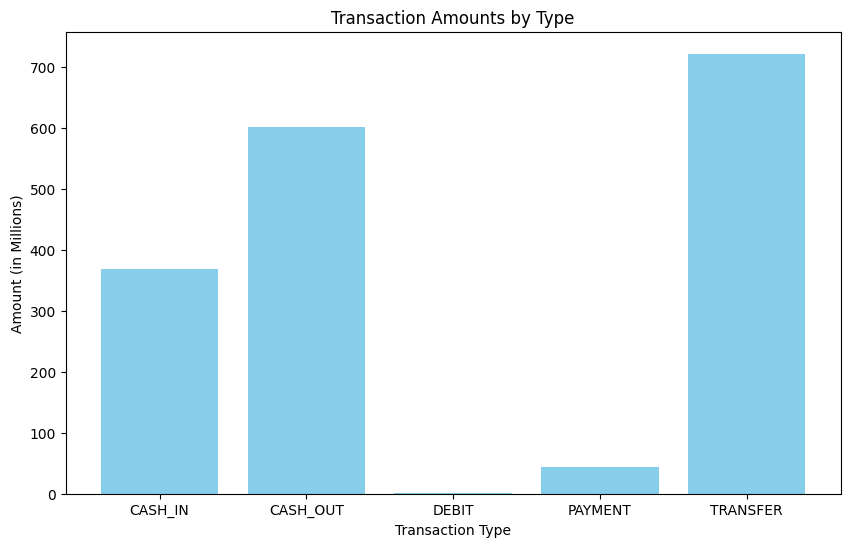

In [79]:
import matplotlib.pyplot as plt
# Provided data in readable amounts in billions
transaction_types1 = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']
amounts_in_millions = [369.0, 601.22, 0.73, 44.31, 721.24]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(transaction_types1, amounts_in_millions, color='skyblue')

# Adding title and labels
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (in Millions)')

# Display the bar chart
plt.show()


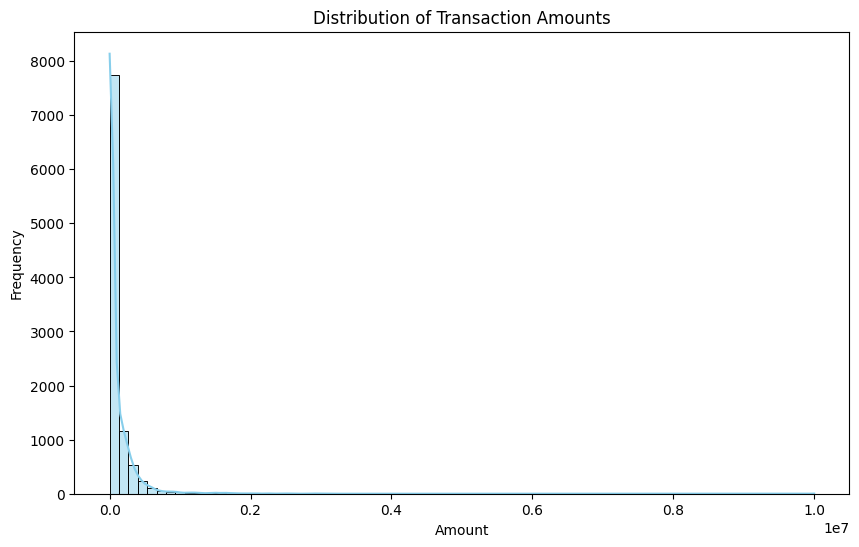

In [80]:
#Visualize the distribution of 'amount' column
plt.figure(figsize=(10, 6))
sns.histplot(subset_fraud['amount'], bins=75, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

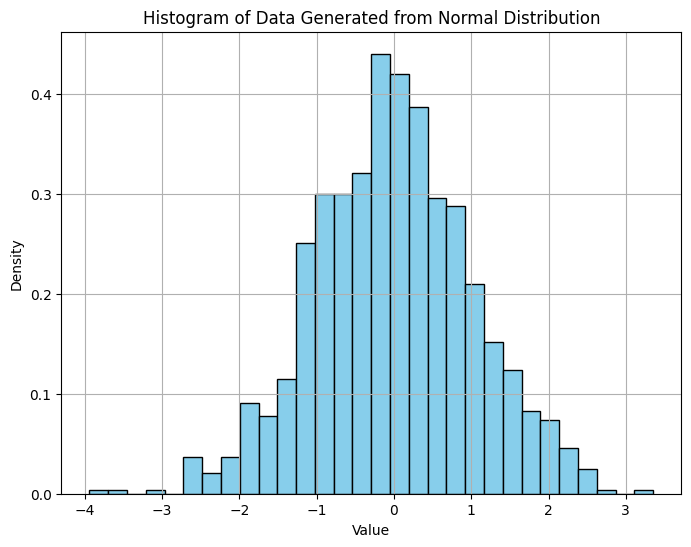

In [81]:

# Parameters for the normal distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
num_samples = 1000  # Number of samples to generate

# Generate data following a normal distribution
subset_fraud_2 = np.random.normal(mean, std_dev, num_samples)

# Plot histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(subset_fraud_2, bins=30, density=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Data Generated from Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

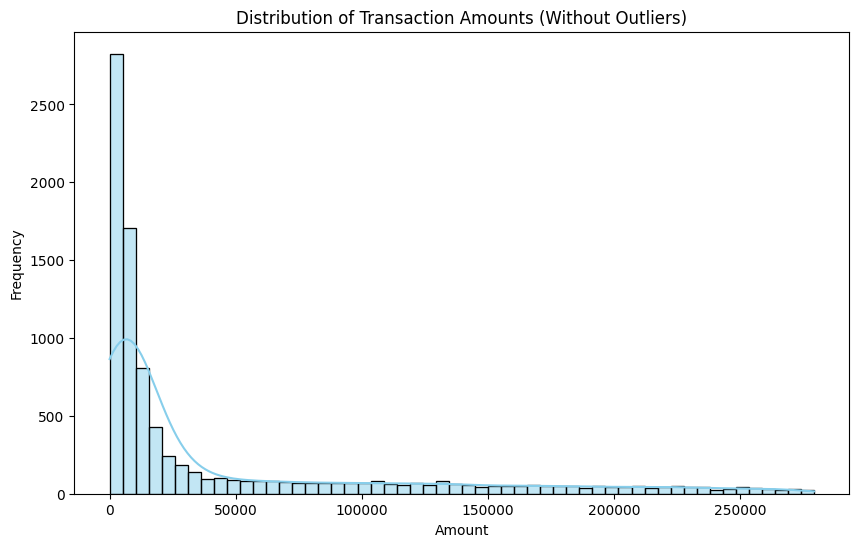

In [82]:
# Calculate the first quartile (Q1)
Q1 = subset_fraud['amount'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = subset_fraud['amount'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
subset_fraud_no_outliers = subset_fraud[(subset_fraud['amount'] >= lower_bound) & (subset_fraud['amount'] <= upper_bound)]

# Plot histogram of the 'amount' column after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(subset_fraud_no_outliers['amount'], kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts (Without Outliers)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


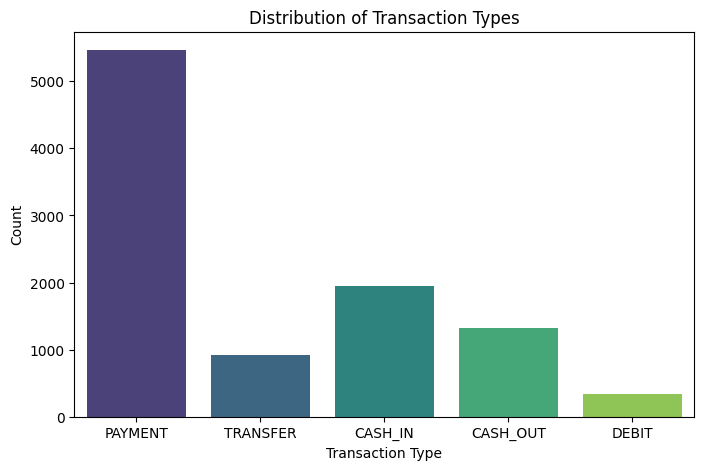

In [83]:
# Step 8: Visualize the distribution of 'type' column
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=subset_fraud, palette='viridis')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

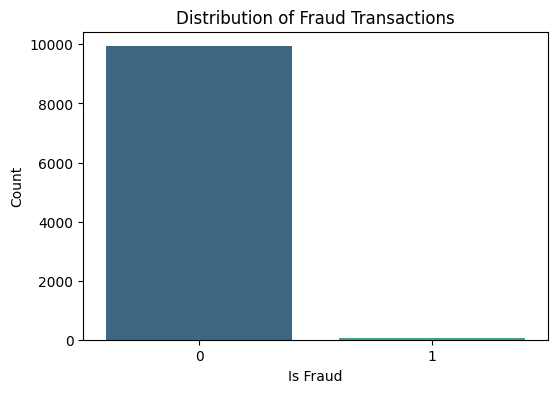

In [84]:
# Visualize the distribution of 'isFraud' column
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=subset_fraud, palette='viridis')
plt.title('Distribution of Fraud Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

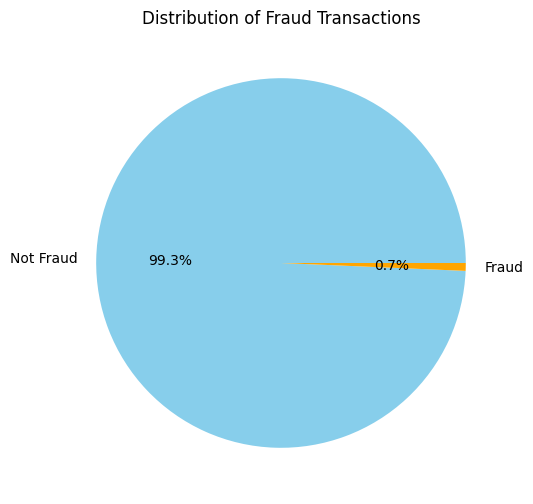

In [85]:
# Visualize the distribution of 'isFraud' column using a pie chart
plt.figure(figsize=(6, 6))
fraud_distribution = subset_fraud['isFraud'].value_counts()
labels = ['Not Fraud', 'Fraud']
plt.pie(fraud_distribution, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Fraud Transactions')
plt.show()


ENCODING

In [86]:
#transform the categorical features into numerical
subset_fraud["type"] = subset_fraud["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [87]:

#subset_fraud["isFraud"] = subset_fraud["isFraud"].map({0: "No Fraud", 1: "Fraud"})
#print(subset_fraud.head())

In [101]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert 'nameOrig' column to numerical values
subset_fraud['nameOrig_encoded'] = label_encoder.fit_transform(subset_fraud['nameOrig'])

# Convert 'nameDest' column to numerical values
subset_fraud['nameDest_encoded'] = label_encoder.fit_transform(subset_fraud['nameDest'])

# Display the first few rows of the modified DataFrame
print(subset_fraud.head())




      step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
6252     6     2    2002.96  C1612554042      186648.78       184645.82   
4684     4     4  522854.73   C539322891           0.00            0.00   
1731     1     3   66413.56  C1541075662     7197141.06      7263554.62   
4742     4     1  116878.60  C1508667424           0.00            0.00   
4521     4     3  489529.12   C656844049    10700000.00     11200000.00   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
6252  M1546272524            0.00            0.00        0               0   
4684  C1916720513      6255171.04      6778025.76        0               0   
1731  C1590550415     19300000.00     19200000.00        0               0   
4742  C1782113663      1356589.82       906564.46        0               0   
4521   C248609774      7760414.85      6736054.44        0               0   

      nameOrig_encoded  nameDest_encoded  
6252              3183              2

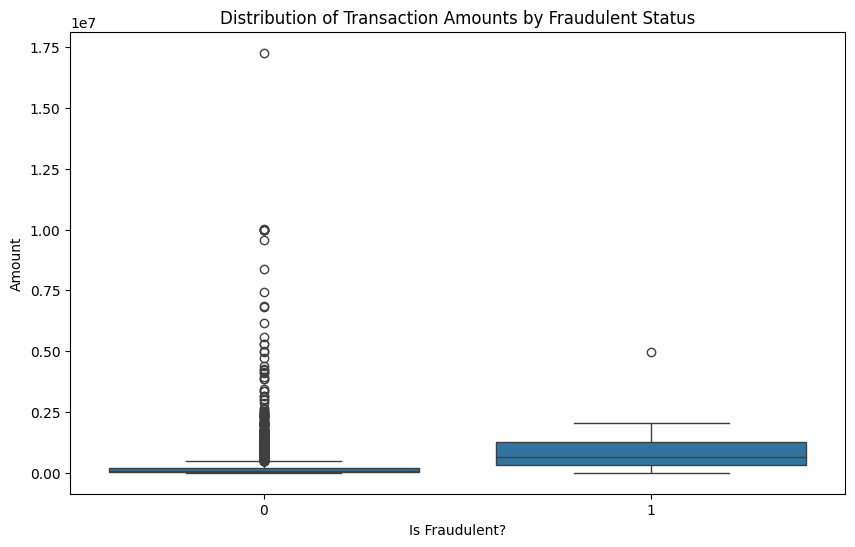

In [ ]:
# Detecting fraudulent transactions
fraudulent_transactions = subset_fraud[subset_fraud['isFraud'] == 1]

# Identify patterns or characteristics of fraudulent transactions
# For example, compare the distribution of amounts for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=subset_fraud)
plt.title('Distribution of Transaction Amounts by Fraudulent Status')
plt.xlabel('Is Fraudulent?')
plt.ylabel('Amount')
plt.show()


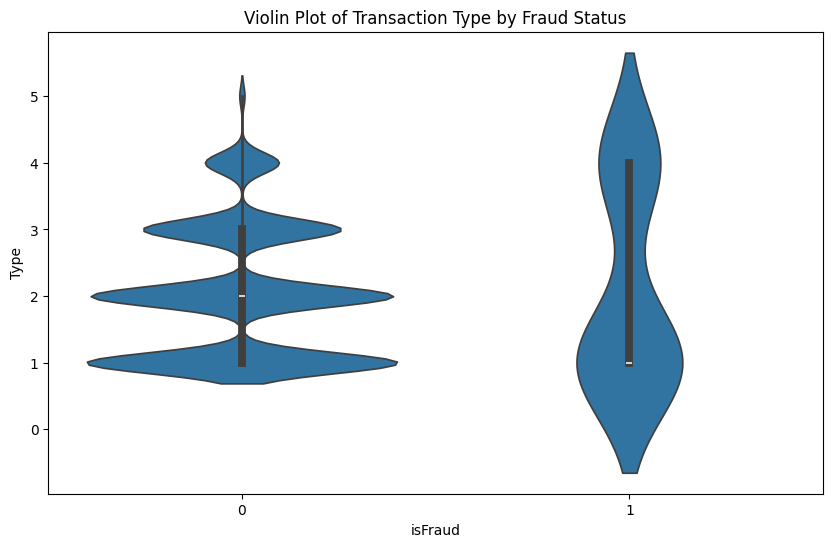

In [ ]:
# Violin plot of type by isFraud
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='type', data=subset_fraud)
plt.title('Violin Plot of Transaction Type by Fraud Status')
plt.xlabel('isFraud')
plt.ylabel('Type')
plt.show()

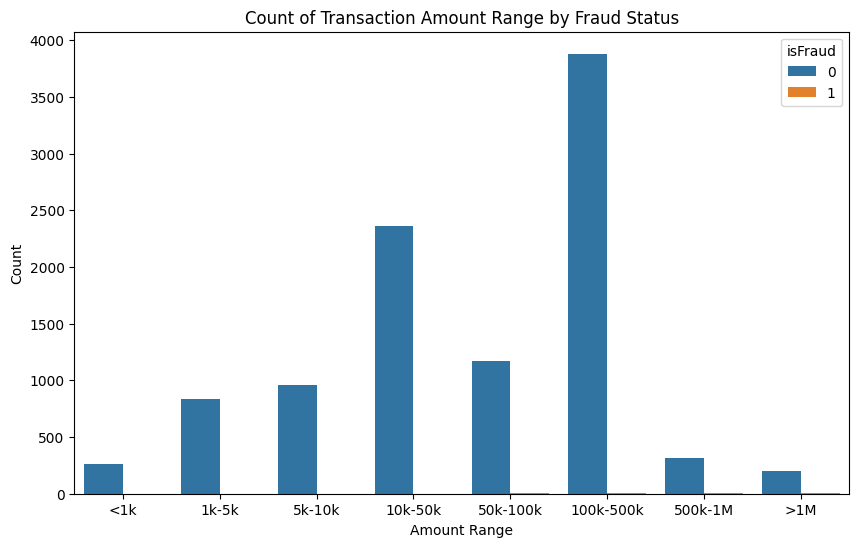

In [ ]:
# Bar plot of amount range by isFraud
# You can create bins for different ranges of amounts and then plot the count of fraudulent transactions in each bin
# Example:
bins = [0, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
labels = ['<1k', '1k-5k', '5k-10k', '10k-50k', '50k-100k', '100k-500k', '500k-1M', '>1M']
subset_fraud['amount_range'] = pd.cut(subset_fraud['amount'], bins=bins, labels=labels)
plt.figure(figsize=(10, 6))
sns.countplot(x='amount_range', hue='isFraud', data=subset_fraud)
plt.title('Count of Transaction Amount Range by Fraud Status')
plt.xlabel('Amount Range')
plt.ylabel('Count')
plt.show()

In [104]:
## Drop columnms NameOrig and NameDest....................not run
# Create a new DataFrame without 'nameOrig' and 'nameDest' columns
fraud_model = subset_fraud.drop(['nameOrig', 'nameDest'], axis=1)
fraud_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig_encoded,nameDest_encoded
6252,6,2,2002.96,186648.78,184645.82,0.00,0.00,0,0,3183,2431
4684,4,4,522854.73,0.00,0.00,6255171.04,6778025.76,0,0,7591,452
1731,1,3,66413.56,7197141.06,7263554.62,19300000.00,19200000.00,0,0,2786,297
4742,4,1,116878.60,0.00,0.00,1356589.82,906564.46,0,0,2596,381
4521,4,3,489529.12,10700000.00,11200000.00,7760414.85,6736054.44,0,0,8196,554


TRAIN TEST SPLIT

In [105]:
# Separate features and target
X = fraud_model.drop('isFraud', axis=1)
y = fraud_model['isFraud']

In [106]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[-0.47766078,  2.82174706, -0.39907163, ...,  0.        ,
        -0.69606966, -0.84408173],
       [-0.88168767,  0.69152374, -0.00957612, ...,  0.        ,
        -0.1258197 , -1.03905026],
       [ 0.73441987, -0.37358791, -0.33496572, ...,  0.        ,
         1.08527275,  1.68544499],
       ...,
       [ 0.73441987, -0.37358791, -0.39634639, ...,  0.        ,
        -0.38718427, -0.18220157],
       [ 1.13844676, -0.37358791, -0.35903483, ...,  0.        ,
        -0.39234958,  1.93358675],
       [-1.28571456, -0.37358791, -0.31865952, ...,  0.        ,
        -0.22947021,  0.48119783]])

LOGISTIC REGRESSION

In [108]:
## TRAIN THE LOGISTIC REGRESSION
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

LogisticRegression()

In [110]:
##  make the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
7217,0,0
8291,0,0
4607,0,0
5114,0,0
1859,0,0
...,...,...
3800,0,0
8510,0,0
1668,0,0
2685,0,0


In [111]:
## evaluate the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred_LR)

print(accuracy_LR)
print(conf_mat)

0.9945
[[1988    0]
 [  11    1]]


In [112]:
# Step 1: Classification Report
print("Classification Report: Logisitic Regression")
print(classification_report(y_test, pred_LR))

Classification Report: Logisitic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       1.00      0.08      0.15        12

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.58      2000
weighted avg       0.99      0.99      0.99      2000



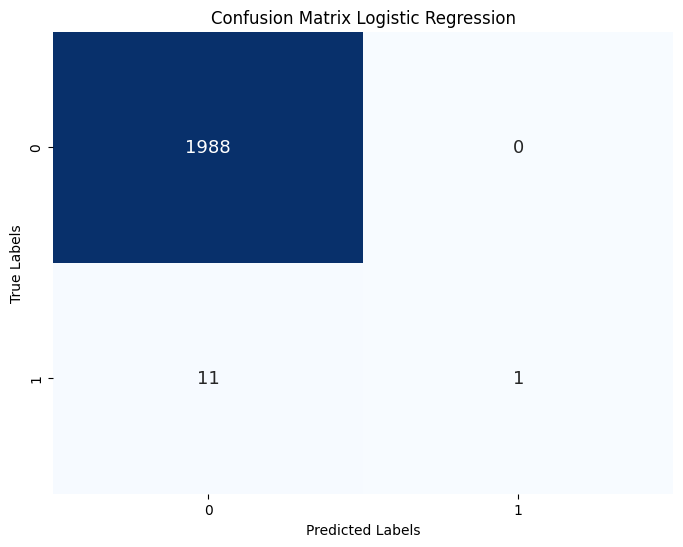

In [113]:
# Step 2: Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

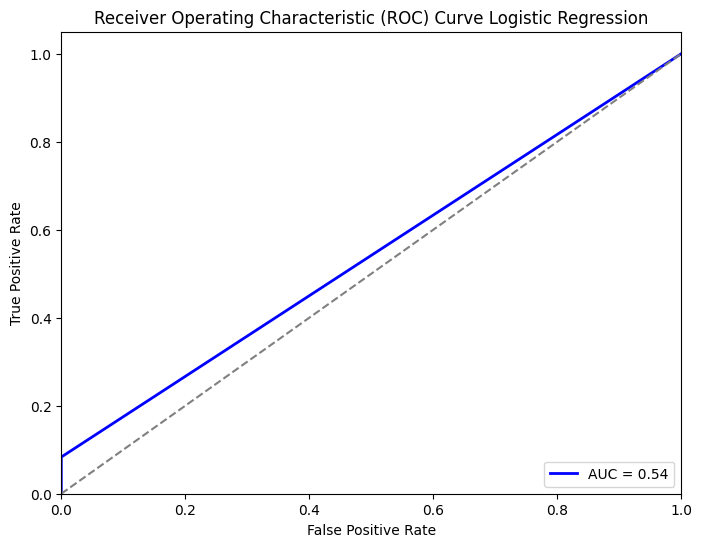

In [116]:
# Step 3: AUC-ROC Curve
auc = roc_auc_score(y_test, pred_LR)
fpr, tpr, thresholds = roc_curve(y_test, pred_LR)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Logistic Regression')
plt.legend(loc='lower right')
plt.show()

========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       1.00      0.08      0.15        12

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.58      2000
weighted avg       0.99      0.99      0.99      2000

========== SVM ==========
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       1.00      0.08      0.15        12

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.58      2000
weighted avg       0.99      0.99      0.99      2000

========== KNN ==========
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       0.00      0.00      0.00        12

    accuracy                           0.99      2000
   macro avg       0.50      0.50 

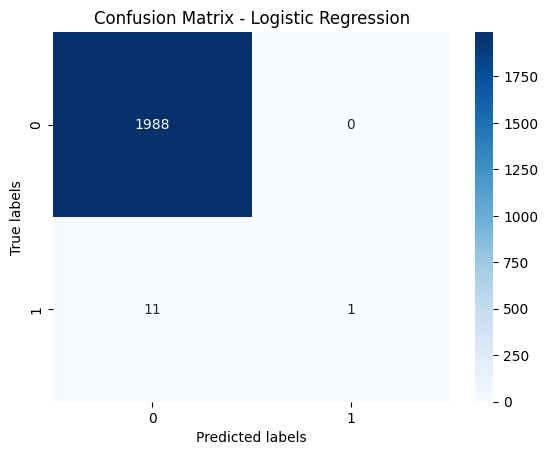

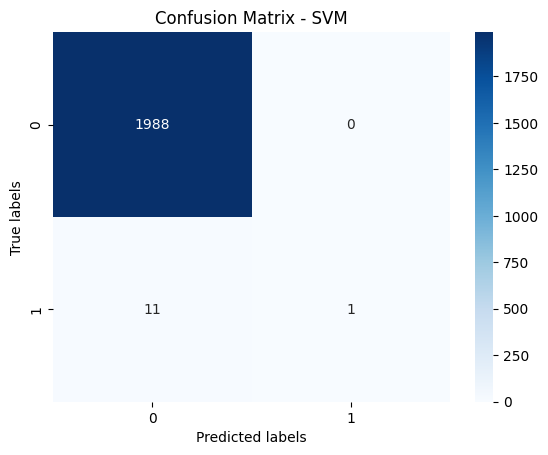

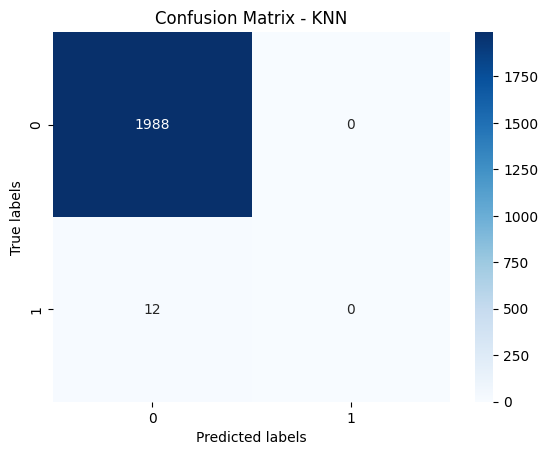

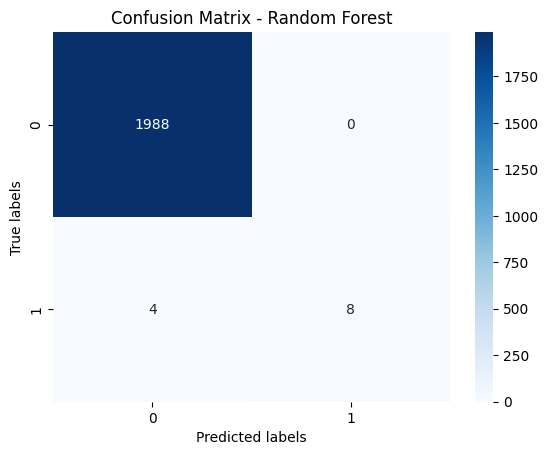

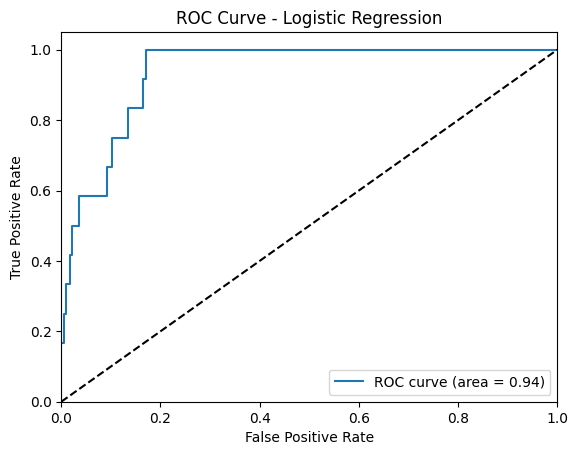

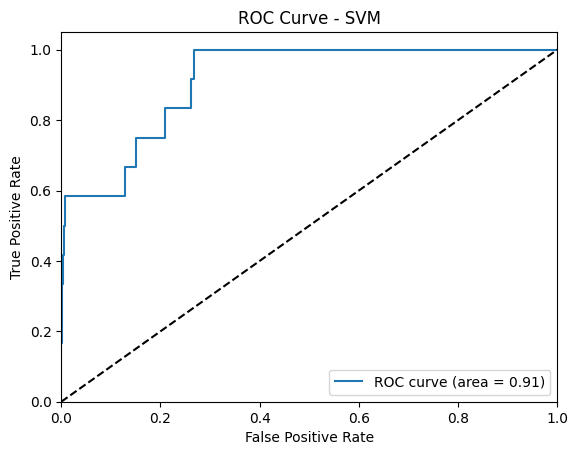

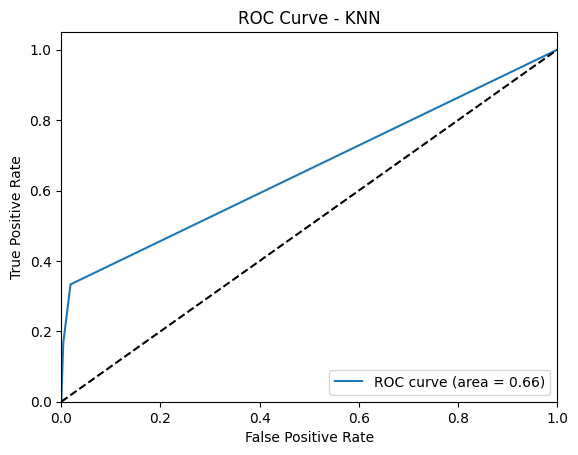

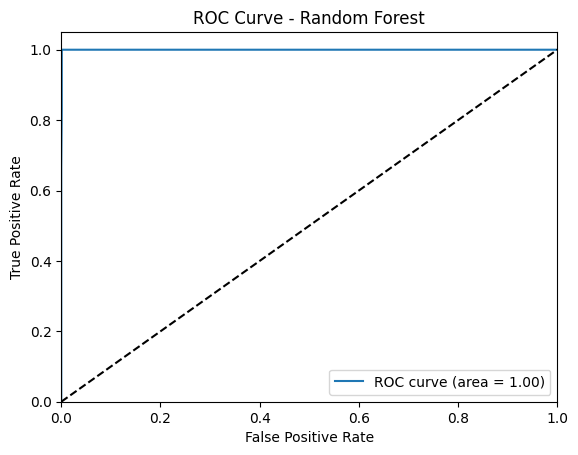

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Separate features and target
X = fraud_model.drop('isFraud', axis=1)
y = fraud_model['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
log_reg_classifier.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_classifier.predict(X_test_scaled)

# SVM
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred_svm = svm_classifier.predict(X_test_scaled)

# KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Classification Reports
print("========== Logistic Regression ==========")
print(classification_report(y_test, y_pred_log_reg))

print("========== SVM ==========")
print(classification_report(y_test, y_pred_svm))

print("========== KNN ==========")
print(classification_report(y_test, y_pred_knn))

print("========== Random Forest ==========")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix - {title}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# ROC Curve
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_true, y_probs))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

y_probs_log_reg = log_reg_classifier.predict_proba(X_test_scaled)[:,1]
y_probs_svm = svm_classifier.predict_proba(X_test_scaled)[:,1]
y_probs_knn = knn_classifier.predict_proba(X_test_scaled)[:,1]
y_probs_rf = rf_classifier.predict_proba(X_test_scaled)[:,1]

plot_roc_curve(y_test, y_probs_log_reg, "Logistic Regression")
plot_roc_curve(y_test, y_probs_svm, "SVM")
plot_roc_curve(y_test, y_probs_knn, "KNN")
plot_roc_curve(y_test, y_probs_rf, "Random Forest")


SVM, KNN, RANDOM TREE

==================== Logistic Regression ====================

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       1.00      0.08      0.15        12

    accuracy                           0.99      2000
   macro avg       1.00      0.54      0.58      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for Logistic Regression:
[[1988    0]
 [  11    1]]


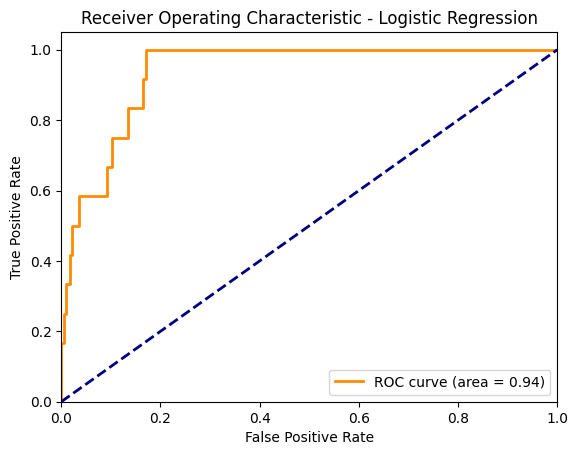

==================== SVM ====================

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       0.00      0.00      0.00        12

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for SVM:
[[1988    0]
 [  12    0]]


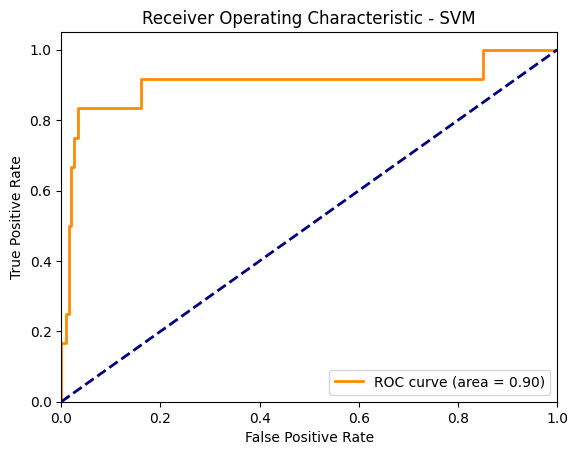

==================== KNN ====================

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1988
           1       0.00      0.00      0.00        12

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000


Confusion Matrix for KNN:
[[1988    0]
 [  12    0]]


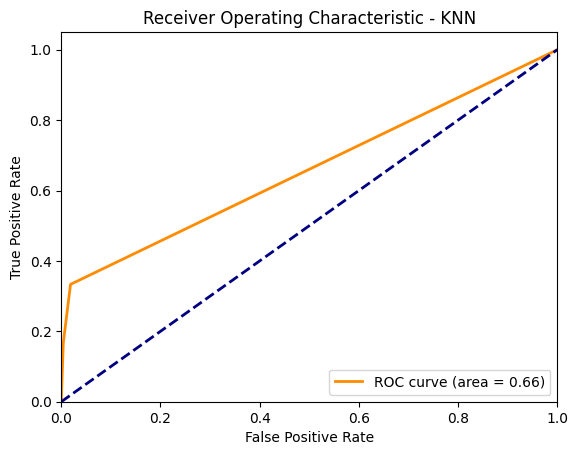

==================== Random Forest ====================

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1988
           1       1.00      0.67      0.80        12

    accuracy                           1.00      2000
   macro avg       1.00      0.83      0.90      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix for Random Forest:
[[1988    0]
 [   4    8]]


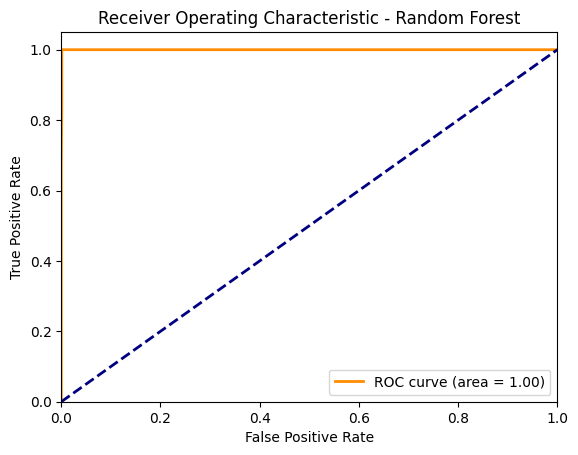

In [123]:
from sklearn.linear_model import LogisticRegression

# Separate features and target
X = fraud_model.drop('isFraud', axis=1)
y = fraud_model['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)
log_reg_classifier.fit(X_train_scaled, y_train)

# Evaluation and Metrics
classifiers = {'Logistic Regression': log_reg_classifier, 'SVM': svm_classifier, 'KNN': knn_classifier, 'Random Forest': rf_classifier}

for clf_name, clf in classifiers.items():
    print(f"==================== {clf_name} ====================")
    y_pred = clf.predict(X_test_scaled)
    
    # Classification Report
    print(f"\nClassification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print(f"\nConfusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    
    # ROC Curve and AUC Score
    if clf_name != 'ANN':
        y_prob = clf.predict_proba(X_test_scaled)[:,1]
    else:
        y_prob = clf.predict(X_test_scaled)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + clf_name)
    plt.legend(loc="lower right")
    plt.show()


==================== Logistic Regression ====================


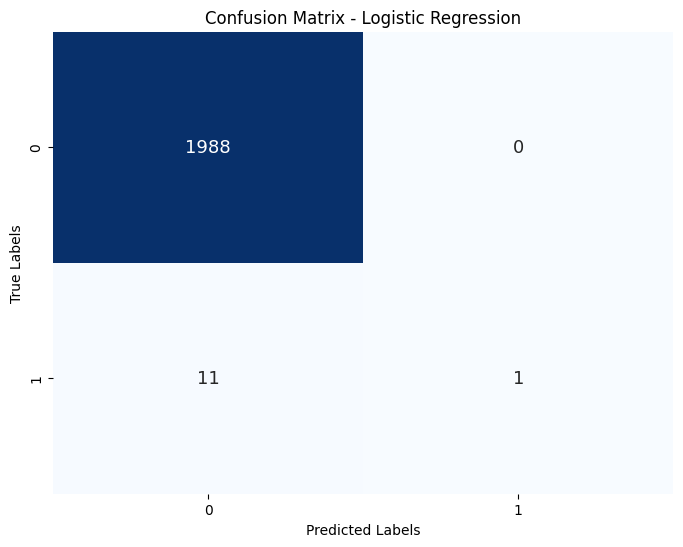

==================== SVM ====================


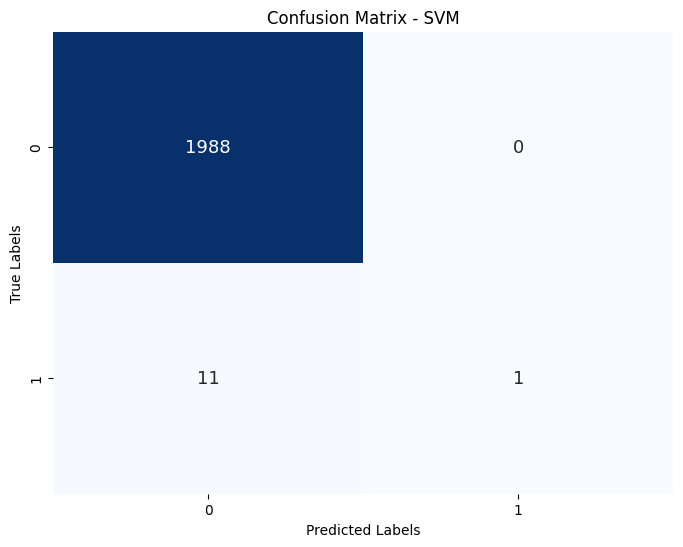

==================== KNN ====================


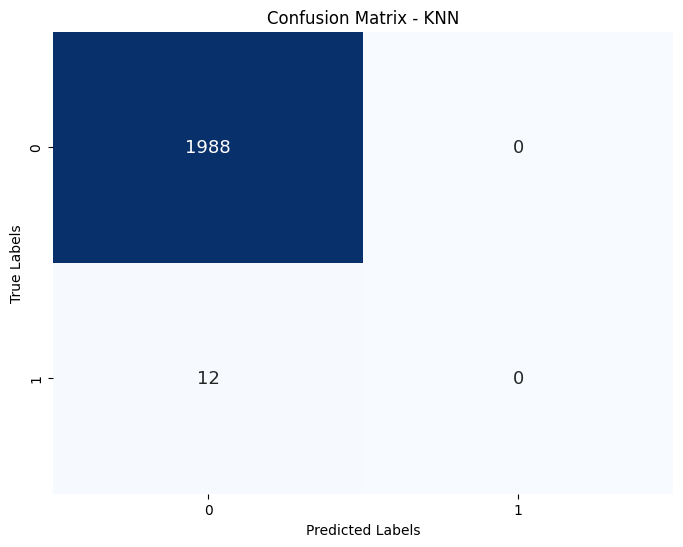

==================== Random Forest ====================


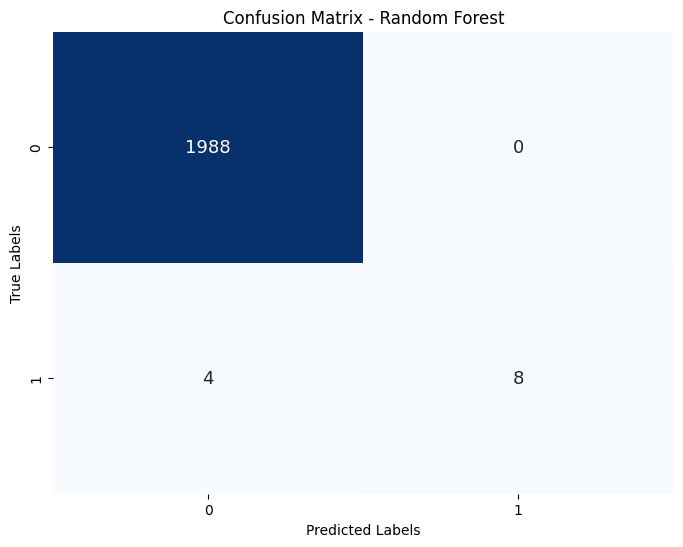

In [128]:

# Define classifiers
classifiers = {'Logistic Regression': log_reg_classifier, 'SVM': svm_classifier, 'KNN': knn_classifier, 'Random Forest': rf_classifier}

# Plot confusion matrix for each classifier
for clf_name, clf in classifiers.items():
    print(f"==================== {clf_name} ====================")
    
    # Predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Calculate confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 13})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()


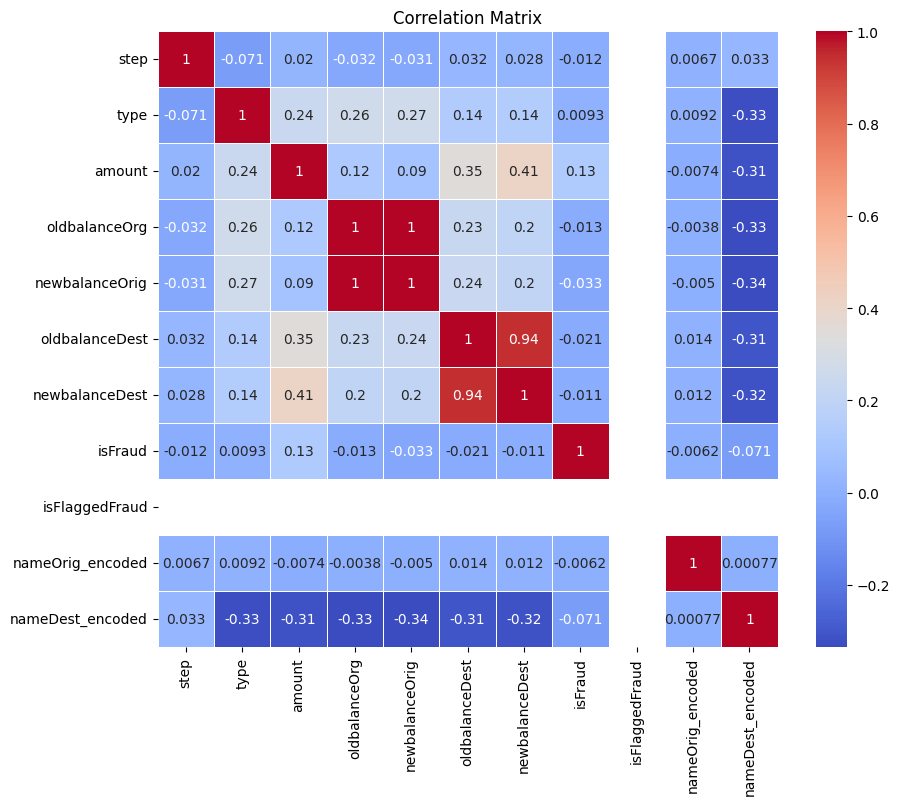

In [122]:
# Step 10: Check for correlations between numeric features
# Compute correlation matrix
correlation_matrix = fraud_model.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()